In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [3]:
print("*************************************************************************************************************************************")
print("**************************************************** Using a Classification model ***************************************************")
print("*************************************************************************************************************************************")

*************************************************************************************************************************************
**************************************************** Using a Classification model ***************************************************
*************************************************************************************************************************************


In [4]:
#importing the datasets we're going to work with

pima_indian_df = pd.read_csv('data/PimaIndians.csv')
pima_indian_df

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive
...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,positive
388,1,128,88,39,110,36.5,1.057,37,positive
389,2,88,58,26,16,28.4,0.766,22,negative
390,10,101,76,48,180,32.9,0.171,63,negative


In [5]:
#Feature and target datasets
y = pima_indian_df['test']
X = pima_indian_df.drop('test', axis=1)

#Performing a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
#instantiating a RandomForestClassifier and fitting it to the training set
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

acc = accuracy_score(y_test, rf.predict(X_test))

#Printing the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))
print("{0:.2%} accuracy on test set.".format(acc))

{'pregnant': 0.07, 'glucose': 0.25, 'diastolic': 0.09, 'triceps': 0.09, 'insulin': 0.14, 'bmi': 0.12, 'family': 0.12, 'age': 0.13}
79.59% accuracy on test set.


In [7]:
# Creating a mask for features importances and the threshold
mask = rf.feature_importances_ > 0.10

reduced_X = X.loc[:, mask]

print(reduced_X.columns)

Index(['glucose', 'insulin', 'bmi', 'family', 'age'], dtype='object')


In [8]:
#wraping a Recursive Feature Eliminator around the random forest model to remove features step by step

rfe = RFE(estimator=RandomForestClassifier(),
         n_features_to_select=2, verbose=1)

rfe.fit(X_train, y_train)

mask = rfe.support_
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Index(['glucose', 'bmi'], dtype='object')
Index(['glucose', 'bmi'], dtype='object')


In [9]:
print ("*************************************************************************************************************************************")
print ("************************************************** Using a linear regression model **************************************************")
print ("*************************************************************************************************************************************")

*************************************************************************************************************************************
************************************************** Using a linear regression model **************************************************
*************************************************************************************************************************************


In [10]:
#importing the datasets we're going to work with

ansur_male_df = pd.read_csv('data/ansur_2_male.csv')
ansur_male_df

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,Combat Arms,Army National Guard,Male,235,1353,312,216,1263,228,193,...,210,347,1016,163,778,67.5,1.688,23.689663,Normal,Normal
4078,Combat Arms,Army National Guard,Male,247,1473,336,234,1346,253,196,...,235,385,1082,178,873,89.6,1.765,28.761967,Overweight,Tall
4079,Combat Arms,Army National Guard,Male,264,1394,313,227,1280,245,193,...,258,353,1011,178,822,83.2,1.690,29.130633,Overweight,Normal
4080,Combat Arms,Army National Guard,Male,203,1417,327,223,1314,250,196,...,192,350,1062,172,837,73.1,1.718,24.766866,Normal,Normal


In [11]:
#Feature and target datasets
X = ansur_male_df.drop(['Branch','Component','Gender','weight_kg','stature_m','BMI','BMI_class','Height_class'], axis=1)
y = ansur_male_df['BMI']

#Performing a 70% training and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Standardizing the data using sklearn.preprocessing StandardScaler(), this will make sure all coefficients 
#face a comparable regularizing force

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train, y_train)
X_train_standardized

array([[ 0.50074995, -0.64082064,  1.14282457, ..., -0.70182805,
         2.00906549, -1.55682402],
       [ 1.11671363,  0.12442095, -1.05890549, ..., -0.25915361,
         0.45723185,  1.19628197],
       [ 0.71499819, -0.46545277,  0.56342192, ..., -0.64408791,
         0.45723185, -0.95832272],
       ...,
       [-0.32946197,  1.6389616 ,  1.14282457, ...,  1.51154415,
        -0.98375653,  1.84266338],
       [ 0.23293965,  0.31573135,  0.04195954, ...,  0.01030039,
        -0.87291127,  0.3344401 ],
       [-0.99898771, -0.38574011,  0.21578034, ..., -0.54785433,
         0.23554133, -1.07802298]])

In [21]:
#Creating the Lasso model and fitting it to the standardized data
la = Lasso()
la.fit(X_train_standardized, y_train)

X_test_std = scaler.fit_transform(X_test, y_test)

#Calculating the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The pourcentage of variance in the test set that model can predict is {0:.1%}. which is quite good !".format(r_squared))


zero_coef = la.coef_ == 0      #A list that has True values when coefficients equal 0
n_ignored = sum(zero_coef == True)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))
print("The number of features taken into consideration is {} out of {}".format(len(la.coef_)-n_ignored ,len(la.coef_)))

The pourcentage of variance in the test set that model can predict is 84.3%. which is quite good !
The model has ignored 82 out of 91 features.
The number of features taken into consideration is 9 out of 91


C:\Users\dell g5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.959e+01, tolerance: 4.680e+00
  model = cd_fast.enet_coordinate_descent(


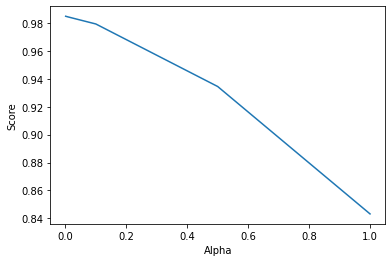

In [22]:
#Finding the highest value for alpha that maximizes the R² score

alpha = [0.001, 0.01 , 0.1 , 0.5 , 1]
scores = []
for a in alpha:
    la = Lasso(alpha=a, random_state=0)
    la.fit(X_train_standardized, y_train)
    X_test_std = scaler.fit_transform(X_test, y_test)
    scores.append(la.score(X_test_std, y_test))

plt.plot(alpha, scores)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()
    